Correlação Entre Variáveis  

In [2]:
import pandas as pd
import numpy as np

In [3]:
df =pd.read_csv("./base_ifood_limpa.csv", sep=";", header=0)

In [4]:
df.head(3)

,Unnamed: 0,availableForScheduling,category,delivery_fee,delivery_time,distance,minimumOrderValue,price_range,rating
0,0,False,Marmita,3.99,27,1.22,10.0,CHEAPEST,0.0
1,1,False,Açaí,7.99,61,4.96,10.0,CHEAPEST,0.0
2,2,False,Bebidas,11.99,70,8.35,5.0,MODERATE,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391674 entries, 0 to 391673
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              391674 non-null  int64  
 1   availableForScheduling  391674 non-null  bool   
 2   category                391674 non-null  object 
 3   delivery_fee            391674 non-null  float64
 4   delivery_time           391674 non-null  int64  
 5   distance                391674 non-null  float64
 6   minimumOrderValue       391674 non-null  float64
 7   price_range             391674 non-null  object 
 8   rating                  391674 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 24.3+ MB


In [13]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)


In [15]:
numericas = df.select_dtypes(include=['number']).columns.tolist()
categoricas = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
#tabela de correlação  
df[numericas].corr()

,delivery_fee,delivery_time,distance,minimumOrderValue,rating
delivery_fee,1.000000,0.208230,0.724071,0.059945,0.030999
delivery_time,0.208230,1.000000,0.423321,0.025275,-0.138348
distance,0.724071,0.423321,1.000000,0.084524,-0.022032
minimumOrderValue,0.059945,0.025275,0.084524,1.000000,0.047161
rating,0.030999,-0.138348,-0.022032,0.047161,1.000000


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Matriz de Correlação')

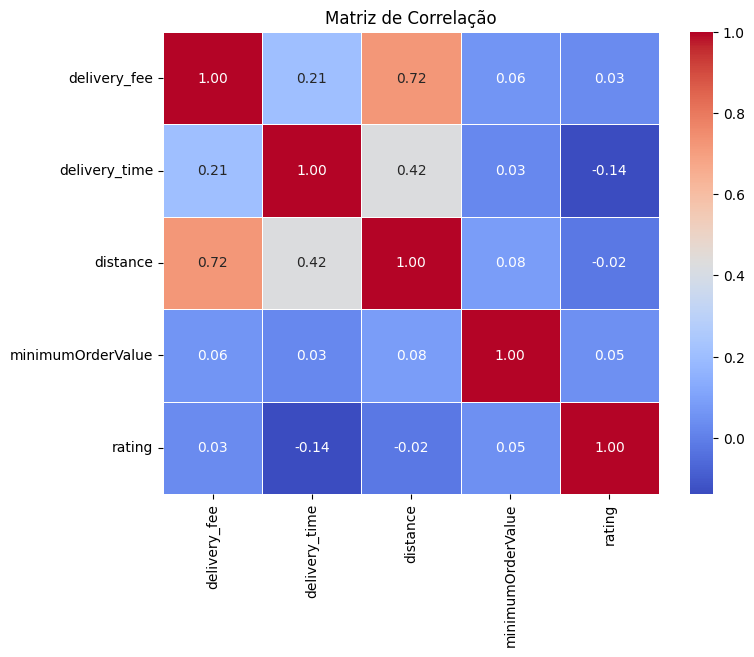

In [ ]:
#configurando o tamanho da figura
plt.figure(figsize=(8,6))
#criar o mapa de calor
sns.heatmap(df[numericas].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
#adicionar titulo
plt.title("Matriz de Correlação")


SCATTERPLOTS

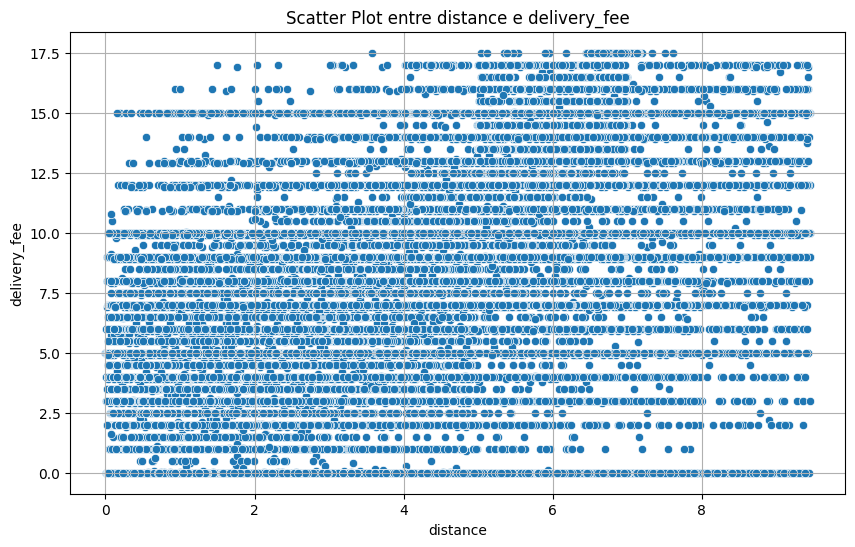

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='distance', y='delivery_fee')
plt.title("Scatter Plot entre distance e delivery_fee")
plt.xlabel("distance")
plt.ylabel("delivery_fee")
#grid exibe a grade no fundo do grafico
plt.grid()
plt.show()

CORRELAÇÃO QUALI VS QUALI 

In [26]:
categoricas = df.select_dtypes(include=['object']).columns.tolist()

In [27]:
categoricas

['category', 'price_range']

In [29]:
df["price_range"].unique()

array(['CHEAPEST', 'MODERATE', 'CHEAP', 'MOST_EXPENSIVE', 'EXPENSIVE'],
      dtype=object)

In [35]:
df["category"].unique()

array(['Marmita', 'Açaí', 'Bebidas', 'Carnes', 'Brasileira', 'Lanches',
       'Congelados', 'Pastel', 'Indiana', 'Árabe', 'Doces & Bolos',
       'Salgados', 'Italiana', 'Pizza', 'Típica do Norte', 'Hambúrguer',
       'Coreana', 'Japonesa', 'Mercado', 'Frangos', 'Cafeteria',
       'Padaria', 'Peixes', 'Saudável', 'Frutos Do Mar', 'Cozinha Rápida',
       'Variada', 'Nordestina', 'Conveniência', 'Sorvetes', 'Mexicana',
       'Portuguesa', 'Chinesa', 'Tapioca', 'Vegetariana', 'Africana',
       'Mineira', 'Sopas & Caldos', 'Argentina', 'Contemporânea',
       'Vegana', 'Peruana', 'Panqueca', 'Mediterrânea', 'Crepe',
       'Yakisoba', 'Alemã', 'Espanhola', 'Francesa', 'Baiana',
       'Presentes', 'Asiática', 'Congelados Fit', 'Colombiana',
       'Casa de Sucos', 'Tailandesa', 'Gaúcha', 'Paranaense', 'Xis',
       'Grega'], dtype=object)

In [36]:
df["category"].value_counts()

category
Lanches            96750
Brasileira         71638
Doces & Bolos      38706
Pizza              34393
Açaí               21824
Marmita            16332
Bebidas            12524
Japonesa           12370
Saudável            9500
Salgados            9423
Carnes              7922
Italiana            6450
Hambúrguer          6264
Sorvetes            5865
Pastel              5801
Padaria             4126
Variada             3935
Mercado             3077
Cafeteria           3076
Conveniência        2937
Árabe               2642
Cozinha Rápida      2445
Congelados          1918
Chinesa             1841
Frutos Do Mar       1275
Mexicana             845
Vegetariana          836
Vegana               631
Peixes               610
Frangos              561
Contemporânea        534
Francesa             487
Casa de Sucos        351
Argentina            345
Sopas & Caldos       299
Portuguesa           288
Mineira              262
Nordestina           258
Tapioca              240
Crepe           

In [41]:
#selecionando somentes as categorias escolhidas
df_categorias_escolhidas = df[df["category"].isin(['Salgados','Açaí','Japonesa'])]
df_categorias_escolhidas

,availableForScheduling,category,delivery_fee,delivery_time,distance,minimumOrderValue,price_range,rating
1,False,Açaí,7.99,61,4.96,10.0,CHEAPEST,0.00000
26,False,Salgados,12.49,60,5.19,20.0,CHEAPEST,0.00000
63,False,Salgados,8.99,55,4.80,20.0,CHEAP,0.00000
65,False,Japonesa,0.00,39,3.96,25.0,CHEAPEST,0.00000
93,False,Salgados,3.00,40,3.24,10.0,CHEAPEST,0.00000
...,...,...,...,...,...,...,...,...
391660,False,Açaí,5.00,40,1.68,15.0,CHEAPEST,4.57143
391663,False,Açaí,5.00,50,2.56,13.0,CHEAPEST,4.05882
391669,False,Açaí,9.00,60,3.53,30.0,CHEAPEST,4.95000
391670,False,Açaí,6.00,50,2.60,10.0,CHEAPEST,0.00000


In [44]:
#criando tabela de contingencia 
contingency_table = pd.crosstab(df_categorias_escolhidas['category'], df_categorias_escolhidas['price_range'])
contingency_table

price_range,CHEAP,CHEAPEST,EXPENSIVE,MODERATE,MOST_EXPENSIVE
category,,,,,
Açaí,1952,19453,43,359,17
Japonesa,926,5199,2027,2787,1431
Salgados,1151,7347,107,797,21


In [45]:
contingency_table.sum(axis=1)

category
Açaí        21824
Japonesa    12370
Salgados     9423
dtype: int64

In [49]:
contingency_table.div(contingency_table.sum(axis=1), axis=0)*100

price_range,CHEAP,CHEAPEST,EXPENSIVE,MODERATE,MOST_EXPENSIVE
category,,,,,
Açaí,8.944282,89.135814,0.197031,1.644978,0.077896
Japonesa,7.485853,42.029103,16.386419,22.530315,11.568310
Salgados,12.214794,77.968800,1.135519,8.458028,0.222859
